In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
df = pd.read_csv('SMSSpamCollection.tsv', sep='\t', names=['label', 'message'])
df.head()

,label,message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [8]:
#exploring the dataset
df['label'].value_counts()

ham     4822
spam     746
Name: label, dtype: int64

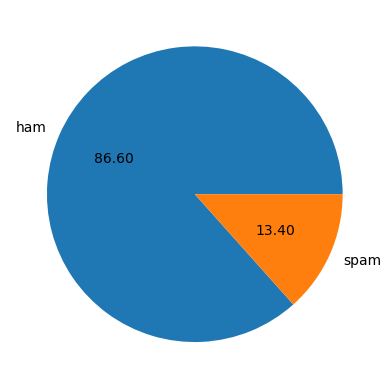

In [9]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),labels =['ham','spam'],autopct="%0.2f")
plt.show()

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kastu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
df['num_characters'] = df['message'].apply(len)

In [12]:
df.head()

,label,message,num_characters
0,ham,I've been searching for the right words to tha...,196
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,ham,"Nah I don't think he goes to usf, he lives aro...",61
3,ham,Even my brother is not like to speak with me. ...,77
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,35


In [13]:
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [14]:
df.head()

,label,message,num_characters,num_words
0,ham,I've been searching for the right words to tha...,196,41
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
2,ham,"Nah I don't think he goes to usf, he lives aro...",61,15
3,ham,Even my brother is not like to speak with me. ...,77,18
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,35,10


In [15]:
df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [16]:
df.head()

,label,message,num_characters,num_words,num_sentences
0,ham,I've been searching for the right words to tha...,196,41,3
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
2,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
3,ham,Even my brother is not like to speak with me. ...,77,18,2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,35,10,2


In [17]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5568.000000,5568.000000,5568.000000
mean,80.487428,18.837105,1.978448
std,59.950961,13.853822,1.423292
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,62.000000,15.000000,2.000000
75%,122.000000,27.000000,2.000000
max,910.000000,220.000000,28.000000


In [18]:
#for spam messages
df[df['label'] == 'spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,746.000000,746.000000,746.000000
mean,138.659517,27.978552,3.034853
std,28.891361,6.853173,1.540110
min,13.000000,2.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [19]:
#for ham messages
df[df['label'] == 'ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4822.000000,4822.000000,4822.000000
mean,71.487764,17.422854,1.815015
std,58.451963,14.122253,1.331646
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,93.000000,23.000000,2.000000
max,910.000000,220.000000,28.000000


In [20]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

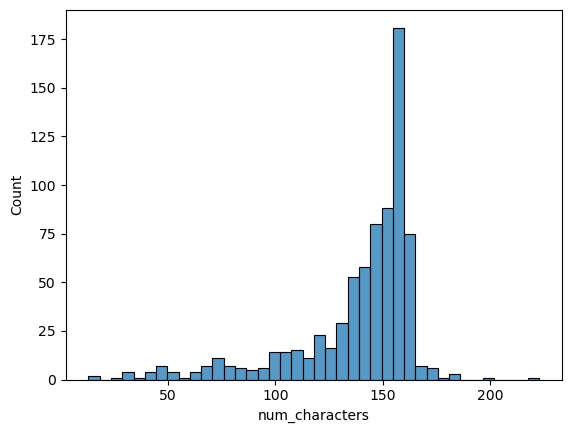

In [21]:
sns.histplot(df[df['label'] == 'spam']['num_characters'])

<Axes: xlabel='num_characters', ylabel='Count'>

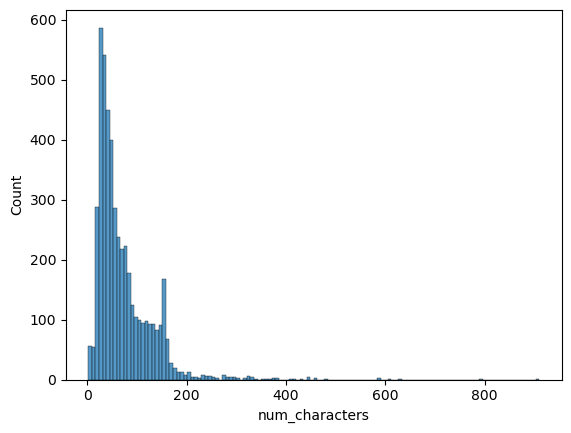

In [22]:
sns.histplot(df[df['label'] == 'ham']['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

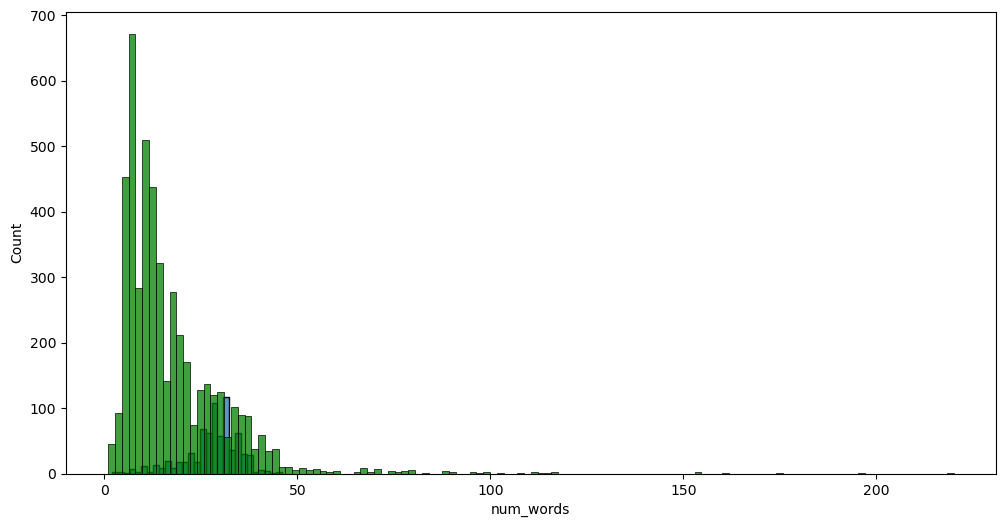

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 'spam']['num_words'])
sns.histplot(df[df['label'] == 'ham']['num_words'],color='green')

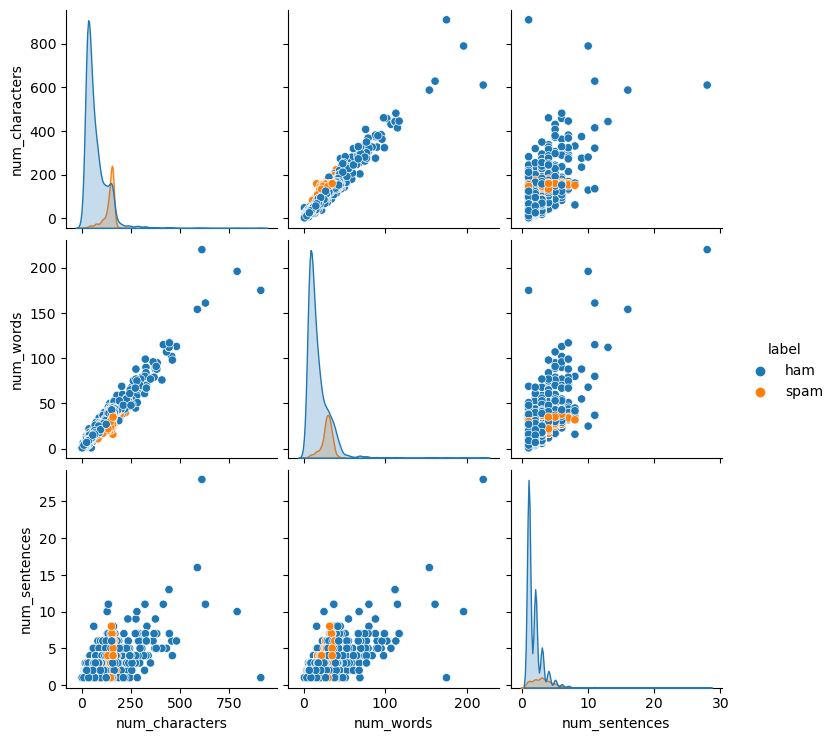

In [24]:
sns.pairplot(df,hue='label')

In [56]:
df['label'] = df['label'].apply(lambda x: 1 if x == 'spam' else 0)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size = 0.3, random_state = 0)

In [58]:
print('rows in test set: ' + str(x_test.shape))
print('rows in train set: ' + str(x_train.shape))

rows in test set: (1671,)
rows in train set: (3897,)


In [66]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df['message'])
y = df['label']

In [76]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [82]:
predictions = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Confusion Matrix: \n', confusion_matrix(y_test, predictions))

Accuracy:  0.8073010173548774
Confusion Matrix: 
 [[1328  100]
 [ 222   21]]


In [86]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Confusion Matrix: \n', confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))
score_2 = f1_score(y_test, predictions, average = 'binary')


Accuracy:  0.8073010173548774
Confusion Matrix: 
 [[1328  100]
 [ 222   21]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1428
           1       0.17      0.09      0.12       243

    accuracy                           0.81      1671
   macro avg       0.52      0.51      0.50      1671
weighted avg       0.76      0.81      0.78      1671



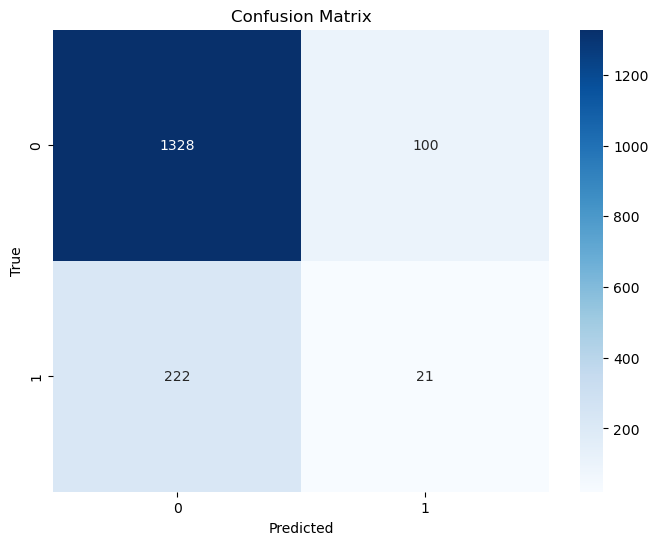

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

cm= confusion_matrix(y_test, predictions)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()